In [28]:
%pip install --upgrade pandas sqlalchemy psycopg2-binary

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.0 MB 4.7 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 4.8 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 5.0 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 5.1 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 5.1 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 5.3 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----------------

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\psycopg2\\_psycopg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip show psycopg2


Name: psycopg2
Version: 2.9.9
Summary: psycopg2 - Python-PostgreSQL Database Adapter
Home-page: https://psycopg.org/
Author: Federico Di Gregorio
Author-email: fog@initd.org
License: LGPL with exceptions
Location: c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
from sqlalchemy import create_engine

def fetch_data_from_rds():

    RDS_HOST = "mlprojectdb.cx4k04y48cjc.eu-north-1.rds.amazonaws.com"
    RDS_PORT = 5432
    RDS_USER = "postgres"
    RDS_PASSWORD = "mlpipeline"
    RDS_DB_NAME = "telco_churn"
    TABLE_NAME = "prod_customers"
    
    # Création de l'URL de connexion avec psycopg2 explicite
    connection_url = f"postgresql+psycopg2://{RDS_USER}:{RDS_PASSWORD}@{RDS_HOST}:{RDS_PORT}/{RDS_DB_NAME}"

    try:
        print("Connexion à RDS en cours...")
        # Requête SQL simple
        query = f"SELECT * FROM {TABLE_NAME}"
        
        # Passer directement l'URL de connexion à pandas (sans créer d'engine)
        ref_df = pd.read_sql_query(query, connection_url)
        
        print(f"Extraction réussie : {len(ref_df)} lignes de réf")
        return ref_df

    except Exception as e:
        print(f"Erreur lors de la connexion à RDS : {e}")
        return None

# # Test rapide de la fonction
# if __name__ == "__main__":
#     ref = fetch_data_from_rds()
#     if ref is not None:
#         print(ref.head())

In [60]:
# data_loader = DataLoader()
customers = fetch_data_from_rds()
customer_prod = customers[customers["ct_Last_training"] == False]
customer_ref = customers[customers["ct_Last_training"] == True]
customer_ref.drop(["ct_Last_training"], axis=1, inplace=True)
customer_prod.drop(["ct_Last_training"], axis=1, inplace=True)

Connexion à RDS en cours...
Extraction réussie : 5839 lignes de réf


In [61]:
customer_prod.shape

(45, 22)

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Configuration de connexion
RDS_HOST = "mlprojectdb.cx4k04y48cjc.eu-north-1.rds.amazonaws.com"
RDS_PORT = 5432
RDS_USER = "postgres"
RDS_PASSWORD = "mlpipeline"
RDS_DB_NAME = "telco_churn"

# URL de connexion
connection_url = f"postgresql+psycopg2://{RDS_USER}:{RDS_PASSWORD}@{RDS_HOST}:{RDS_PORT}/{RDS_DB_NAME}"

# Requête pour lister toutes les tables dans le schéma public
query = """
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = 'public'
ORDER BY table_name;
"""

# Exécution de la requête
try:
    tables_df = pd.read_sql_query(query, connection_url)
    print(f"Nombre de tables trouvées : {len(tables_df)}")
    print("\nListe des tables :")
    print(tables_df)
except Exception as e:
    print(f"Erreur : {e}")

Nombre de tables trouvées : 5

Liste des tables :
      table_name
0      customers
1       feedback
2  new_customers
3    predictions
4  training_runs


In [5]:
ref.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,No,...,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,...,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,...,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True


In [61]:
import pandas as pd
from sqlalchemy import create_engine

def fetch_all_tables_from_rds():
    """
    Récupère toutes les tables de la base de données telco_churn et retourne un dictionnaire de DataFrames.
    
    Returns:
        dict: Dictionnaire où les clés sont les noms de tables et les valeurs sont les DataFrames
    """
    RDS_HOST = "mlprojectdb.cx4k04y48cjc.eu-north-1.rds.amazonaws.com"
    RDS_PORT = 5432
    RDS_USER = "postgres"
    RDS_PASSWORD = "mlpipeline"
    RDS_DB_NAME = "telco_churn"
    
    # URL de connexion
    connection_url = f"postgresql+psycopg2://{RDS_USER}:{RDS_PASSWORD}@{RDS_HOST}:{RDS_PORT}/{RDS_DB_NAME}"
    
    # Liste des tables
    table_names = ['customers', 'feedback', 'new_customers', 'predictions', 'training_runs']
    
    # Dictionnaire pour stocker les DataFrames
    dataframes = {}
    
    try:
        print("Récupération de toutes les tables...")
        
        for table_name in table_names:
            query = f"SELECT * FROM {table_name}"
            df = pd.read_sql_query(query, connection_url)
            dataframes[table_name] = df
            print(f"{table_name}: {len(df)} lignes récupérées")
        
        print(f"\nTotal: {len(dataframes)} tables récupérées avec succès")
        return dataframes
    
    except Exception as e:
        print(f"Erreur lors de la récupération des tables : {e}")
        return None

# Exécution de la fonction
tables = fetch_all_tables_from_rds()

# Accès aux DataFrames individuels
if tables:
    customers_df = tables['customers']
    feedback_df = tables['feedback']
    new_customers_df = tables['new_customers']
    predictions_df = tables['predictions']
    training_runs_df = tables['training_runs']
    
    print("\n" + "="*50)
    print("DataFrames disponibles:")
    print("="*50)
    for name, df in tables.items():
        print(f"{name}: {df.shape[0]} lignes × {df.shape[1]} colonnes")

Récupération de toutes les tables...
customers: 7047 lignes récupérées
feedback: 4 lignes récupérées
Erreur lors de la récupération des tables : (psycopg2.errors.UndefinedTable) relation "new_customers" does not exist
LINE 1: SELECT * FROM new_customers
                      ^

[SQL: SELECT * FROM new_customers]
(Background on this error at: https://sqlalche.me/e/20/f405)


In [65]:
customers_df=ref

In [66]:
customers_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn', 'status',
       'notified', 'updated_at', 'first_name', 'last_name', 'email'],
      dtype='object')

In [67]:
customers_df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,payment_method,monthly_charges,total_charges,churn,status,notified,updated_at,first_name,last_name,email
0,5126-RCXYW,Male,False,True,True,54,False,No phone service,DSL,No,...,Credit card (automatic),46.00,2424.05,False,None,False,2026-01-03 22:58:29.239357,Huda,Al-Taher,huda.al-taher@outlook.com
1,6734-GMPVK,Male,False,False,False,5,True,Yes,Fiber optic,No,...,Electronic check,105.30,550.60,False,None,False,2026-01-03 22:58:29.239357,Barbara,Lee,barbara.lee@hotmail.com
2,8327-LZKAS,Female,True,True,False,43,True,Yes,Fiber optic,No,...,Electronic check,107.55,4533.90,True,None,False,2026-01-03 22:58:29.239357,Abdullah,Al-Hakim,abdullah.al-hakim@gmail.com


In [68]:
predictions_df["features_json"]

NameError: name 'predictions_df' is not defined

In [19]:
customers_df.to_csv("customers_export.csv", index=False)

In [114]:
customers_df = pd.read_csv("customers_export.csv")

In [3]:
import pandas as pd

In [ ]:
import joblib
import os
import sys

# Ajouter le chemin du module pipeline pour permettre l'import lors du unpickling
pipeline_path = os.path.abspath('./artifacts')
if pipeline_path not in sys.path:
    sys.path.append(pipeline_path)
    print(f"Chemin ajouté au sys.path: {pipeline_path}")

# Charger le modèle
model_path = './artifacts/churn_pipeline.pkl'

if os.path.exists(model_path):
    print(f"Chargement du modèle depuis: {model_path}")
    model = joblib.load(model_path)
    print(f"Modèle chargé avec succès!")
    print(f"Type du modèle: {type(model)}")
else:
    print(f"ERREUR: Fichier non trouvé: {model_path}")
    print("Vérifiez le chemin du modèle.")

Chemin ajouté au sys.path: c:\Users\Admin\Desktop\M2 UCBL DS\Machine Learning\Projet\ProjetML1UCBL1\reporting\artifacts
Chargement du modèle depuis: ./artifacts/churn_pipeline.pkl
Modèle chargé avec succès!
Type du modèle: <class 'sklearn.pipeline.Pipeline'>


In [5]:
model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",1.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept:

In [ ]:
customer_prod = pd.read_csv("customer_prod.csv")

In [10]:
customer_prod.drop(columns=["customer_id","predictions"], inplace=True)

In [13]:
customer_prod

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Male,False,False,True,6,True,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,False,Mailed check,29.880089,184.05,False
1,Female,False,True,True,1,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,True,Electronic check,22.565987,19.90,True
2,Female,False,True,False,22,True,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,True,Mailed check,62.028116,1178.75,False
3,Male,False,True,False,14,False,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,False,Electronic check,52.559473,667.70,True
4,Male,False,True,True,64,True,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,False,Credit card (automatic),102.340721,5629.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Male,False,True,True,24,True,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,True,Mailed check,96.160589,1990.50,True
1405,Female,False,True,True,72,True,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,True,Credit card (automatic),117.025622,7362.90,True
1406,Female,False,True,True,11,False,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,True,Electronic check,33.565489,346.45,False
1407,Male,True,True,False,4,True,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Mailed check,84.367309,306.60,True


In [27]:
customer_prod.drop_duplicates(inplace=True)

In [28]:
y=customer_prod["churn"]
X=customer_prod.drop(columns=["churn"])

In [29]:
X.shape

(1408, 19)

In [30]:
X.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [31]:
print(f"Shape of X: {len(X)}")
print(f"Shape of y: {len(y)}")

# If you're using DataFrames/NumPy
# print(X.shape)
# print(y.shape)

Shape of X: 1408
Shape of y: 1408


In [32]:
model.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",1.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept:

In [118]:
customers =customers_df

In [119]:
# Vérifier que le modèle est bien chargé
print(f"Pipeline steps: {model.named_steps.keys()}")

Pipeline steps: dict_keys(['preprocess', 'model'])


In [120]:
churn = customers["churn"]

In [121]:
# Retirer la colonne 'churn' (target) avant de faire la prédiction
customers_features = customers.drop('churn', axis=1)
customers["predictions"] = model.predict(customers_features)
customers["churn"] =churn


In [122]:
customers.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'predictions'],
      dtype='object')

In [123]:
# Déviser les donnees en ref et prod
split_index = int(customers.shape[0] * 0.8)

customer_ref = customers.iloc[:split_index]
customer_prod = customers.iloc[split_index:]
# customer_prod = pd.read_csv("customer_drift.csv")
churn  = customer_prod['churn']
customer_prod = customer_prod.drop('churn', axis=1)
customer_prod = customer_prod.drop('predictions', axis=1)
customer_prod["predictions"] = model.predict(customer_prod)
customer_prod["churn"] = churn

In [124]:
customer_prod[['churn', 'predictions']].head(10)

,churn,predictions
5634,False,False
5635,True,False
5636,False,True
5637,True,True
5638,False,False
5639,True,False
5640,False,False
5641,True,True
5642,False,False
5643,False,False


In [125]:
customer_ref.shape

(5634, 22)

In [126]:
import random
# --- SIMULATION DE CONCEPT DRIFT (Casser le Recall) ---
# On cible les clients avec un contrat 'One year' ou 'Two year' (normalement fidèles)
# et on les fait churner artificiellement.
mask_fidele = customer_prod['contract'].isin(['One year', 'Two year'])
customer_prod.loc[mask_fidele, 'churn'] = True 

# --- SIMULATION DE DATA DRIFT (Alerte Evidently) ---
# On augmente massivement les charges mensuelles pour simuler une inflation
customer_prod['monthly_charges'] = customer_prod['monthly_charges'] * random.uniform(0.5,2.)

In [127]:
customer_ref.to_csv("customer_ref.csv", index=False)
customer_prod.to_csv("customer_prod.csv", index=False)

array([ True, False,  True])

In [93]:
# Stocker les données avec le preprocessor
prod_predictions = customer_prod["predictions"]
ref_predictions = customer_ref["predictions"]
prod_churn = customer_prod["churn"]
ref_churn = customer_ref["churn"]
customer_ref = customer_ref.drop('predictions', axis=1)
customer_prod = customer_prod.drop('predictions', axis=1)


In [94]:
# Transformer les données avec le preprocessor
preprocessor = model.named_steps['preprocess']
customer_ref = preprocessor.transform(customer_ref)
customer_prod = preprocessor.transform(customer_prod)

In [95]:
# Récuperer les predictions et les
customer_prod["predictions"] = prod_predictions
customer_ref["predictions"] = ref_predictions
customer_prod["churn"]=prod_churn
customer_ref["churn"]=ref_churn

In [96]:
customer_prod["predictions"] = customer_prod["predictions"].map({False: 0, True: 1})
customer_ref["predictions"] = customer_ref["predictions"].map({False: 0, True: 1})
customer_prod["churn"] = customer_prod["churn"].map({False: 0, True: 1})
customer_ref["churn"]  = customer_ref["churn"].map({False: 0, True: 1})

In [97]:
customer_prod["predictions"].isna().sum()


np.int64(0)

In [ ]:
import os
import pandas as pd
from sqlalchemy import create_engine
from evidently import Report, Dataset, BinaryClassification, DataDefinition
from evidently.presets import DataDriftPreset, ClassificationPreset
from evidently.ui.workspace import Workspace


def create_report():
    ws = Workspace.create("workspace")
    
    # Création ou récupération du projet
    existing_projects = ws.search_project("Churn Monitoring")
    if not existing_projects:
        project = ws.create_project("Churn Monitoring")
    else:
        project = existing_projects[0]

    # Configuration de la définition des données
    definition = DataDefinition(
        classification=[BinaryClassification(
            target="churn",
            prediction_labels="predictions"
        )],
        categorical_columns=[
        "churn", "predictions",
        "senior_citizen", "partner", "dependents", 
        "online_security", "tech_support", "paperless_billing",
        "internet_service_DSL", "internet_service_Fiber_optic",
        "contract_One_year", "contract_Two_year",
        "payment_method_Electronic_check", "payment_method_Mailed_check",
        "payment_method_Bank_transfer"
    ]
    )

    # Créer les Dataset objects
    current_data = Dataset.from_pandas(customer_prod, data_definition=definition)
    reference_data = Dataset.from_pandas(customer_ref, data_definition=definition)
    
    # Créer et exécuter le rapport
    report = Report(metrics=[
        DataDriftPreset(),
        ClassificationPreset(),
    ])
    
    my_eval = report.run(reference_data=reference_data, current_data=current_data)
    
    # Ajout du run au workspace
    ws.add_run(project.id, my_eval, include_data=False)
    print("Nouveau rapport généré avec succès.")
    return my_eval

if __name__ == "__main__":
    my_eval = create_report()

✓ Nouveau rapport généré avec succès.


In [113]:
import json
json.loads(my_eval.json())["metrics"]

[{'id': '15e89f895b482f9b84ba7274ed18a106',
  'metric_name': 'DriftedColumnsCount(drift_share=0.5)',
  'config': {'type': 'evidently:metric_v2:DriftedColumnsCount',
   'drift_share': 0.5},
  'value': {'count': 6.0, 'share': 0.35294117647058826}},
 {'id': 'ff1961a00c6b6f4568f89bc77ce636f3',
  'metric_name': 'ValueDrift(column=monthly_charges,method=Wasserstein distance (normed),threshold=0.1)',
  'config': {'type': 'evidently:metric_v2:ValueDrift',
   'column': 'monthly_charges',
   'method': 'Wasserstein distance (normed)',
   'threshold': 0.1},
  'value': 0.5632479250760899},
 {'id': '50fcb9165d444c9f9c7981f58dca7bdf',
  'metric_name': 'ValueDrift(column=total_charges,method=Wasserstein distance (normed),threshold=0.1)',
  'config': {'type': 'evidently:metric_v2:ValueDrift',
   'column': 'total_charges',
   'method': 'Wasserstein distance (normed)',
   'threshold': 0.1},
  'value': 0.18678043181489346},
 {'id': 'e0ffda6293333226a0a832cbf0a7c892',
  'metric_name': 'ValueDrift(column=ch

In [ ]:
# Extraire les métriques pertinentes du rapport Evidently
import json

# Charger les métriques
metrics = json.loads(my_eval.json())["metrics"]

# Dictionnaire pour stocker les résultats
results = {
    "drift_scores": {},
    "global_drift": {},
    "classification": {}
}

# Parcourir toutes les métriques
for metric in metrics:
    metric_name = metric.get("metric_name", "")
    config = metric.get("config", {})
    value = metric.get("value")
    
    # 1. Extraire les drifts des colonnes spécifiques
    if "ValueDrift" in metric_name:
        column = config.get("column", "")
        if column in ["payment_method_Electronic_check", "internet_service_Fiber_optic", 
                     "monthly_charges", "paperless_billing"]:
            results["drift_scores"][column] = value
    
    # 2. Extraire le drift global (nombre de colonnes driftées)
    elif "DriftedColumnsCount" in metric_name:
        results["global_drift"]["nombre_colonnes_driftees"] = value.get("count")
        results["global_drift"]["share_colonnes_driftees"] = value.get("share")
    
    # 3. Extraire les métriques de classification
    elif "Accuracy" in metric_name:
        results["classification"]["accuracy"] = value
    elif "Precision" in metric_name and "ByLabel" not in metric_name:
        results["classification"]["precision"] = value
    elif "Recall" in metric_name and "ByLabel" not in metric_name:
        results["classification"]["recall"] = value
    elif "F1Score" in metric_name and "ByLabel" not in metric_name:
        results["classification"]["f1_score"] = value

# 4. Nombre total d'enregistrements (current data)
results["data_info"] = {
    "nombre_enregistrements_current": len(customer_prod),
    "nombre_enregistrements_reference": len(customer_ref),
    "nombre_colonnes": len(customer_prod.columns)
}

# Afficher les résultats
print("="*60)
print("RÉSUMÉ DES MÉTRIQUES EXTRAITES")
print("="*60)

print("\nDRIFT DES COLONNES SPÉCIFIQUES:")
for col, drift in results["drift_scores"].items():
    print(f"  - {col}: {drift:.4f}")

print("\nDRIFT GLOBAL:")
print(f"  - Nombre de colonnes driftées: {results['global_drift']['nombre_colonnes_driftees']:.0f}")
print(f"  - Pourcentage de colonnes driftées: {results['global_drift']['share_colonnes_driftees']:.2%}")

print("\nPERFORMANCE DU MODÈLE:")
print(f"  - Accuracy: {results['classification']['accuracy']:.4f}")
print(f"  - Precision: {results['classification']['precision']:.4f}")
print(f"  - Recall: {results['classification']['recall']:.4f}")
print(f"  - F1 Score: {results['classification']['f1_score']:.4f}")

print("\nINFORMATIONS SUR LES DONNÉES:")
print(f"  - Nombre d'enregistrements (current): {results['data_info']['nombre_enregistrements_current']}")
print(f"  - Nombre d'enregistrements (reference): {results['data_info']['nombre_enregistrements_reference']}")
print(f"  - Nombre de colonnes: {results['data_info']['nombre_colonnes']}")

print("\n" + "="*60)

📊 RÉSUMÉ DES MÉTRIQUES EXTRAITES

🔍 DRIFT DES COLONNES SPÉCIFIQUES:
  • monthly_charges: 0.5632
  • paperless_billing: 0.0936
  • internet_service_Fiber_optic: 0.0990
  • payment_method_Electronic_check: 0.0046

📈 DRIFT GLOBAL:
  • Nombre de colonnes driftées: 6
  • Pourcentage de colonnes driftées: 35.29%

🎯 PERFORMANCE DU MODÈLE:
  • Accuracy: 0.7800
  • Precision: 0.5417
  • Recall: 1.0000
  • F1 Score: 0.7027

📋 INFORMATIONS SUR LES DONNÉES:
  • Nombre d'enregistrements (current): 50
  • Nombre d'enregistrements (reference): 5634
  • Nombre de colonnes: 17



In [29]:
customer_prod.dtypes

senior_citizen                       int64
partner                              int64
dependents                           int64
online_security                      int64
tech_support                         int64
paperless_billing                    int64
monthly_charges                    float64
total_charges                      float64
churn                                int64
internet_service_DSL                 int64
internet_service_Fiber_optic         int64
contract_One_year                    int64
contract_Two_year                    int64
payment_method_Electronic_check      int64
payment_method_Mailed_check          int64
payment_method_Bank_transfer         int64
predictions                          int64
dtype: object

In [116]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 3.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.7 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.1 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.5 MB/s 

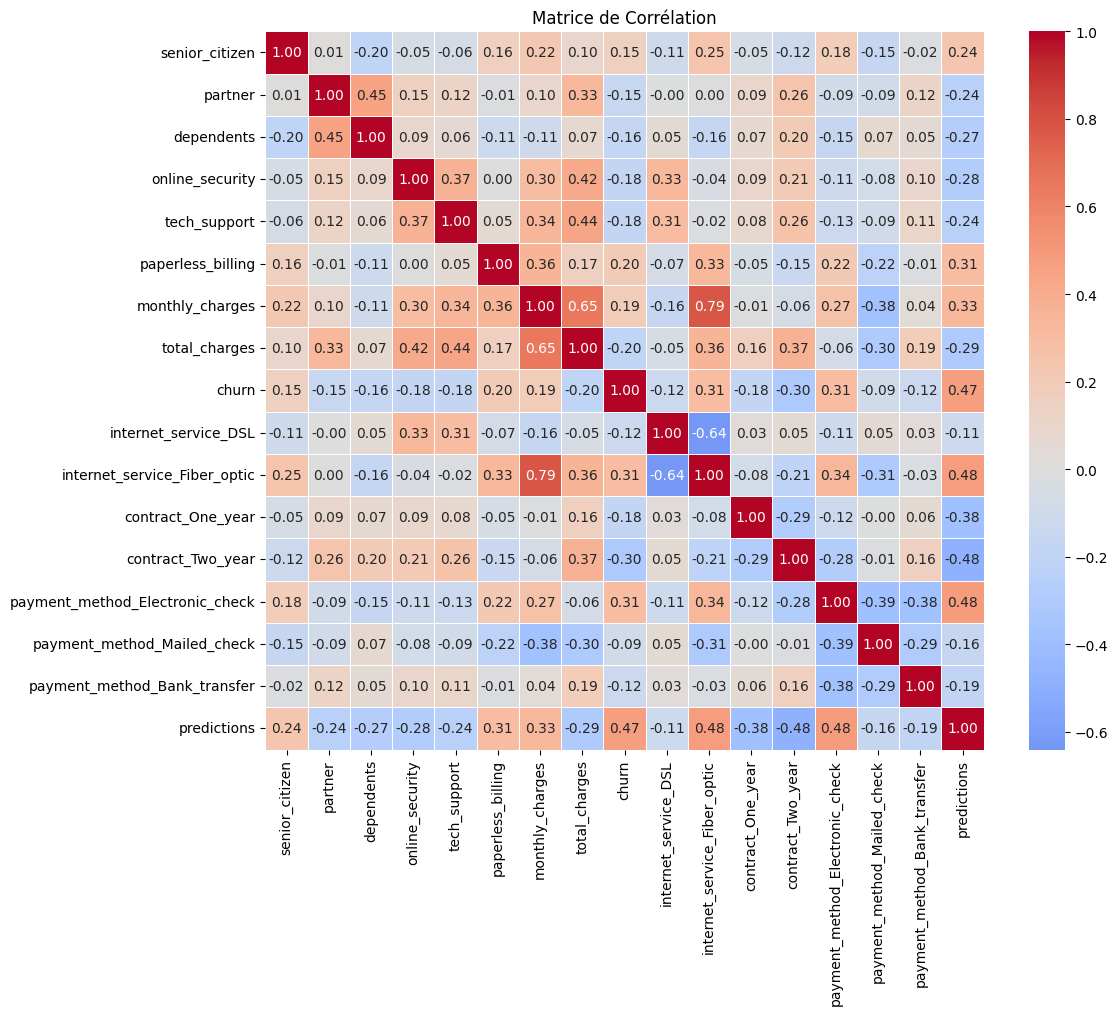

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = customer_ref.corr()

# Visualiser avec heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,           # Afficher les valeurs
            cmap='coolwarm',      # Palette de couleurs
            center=0,             # Centrer sur 0
            fmt='.2f',            # Format 2 décimales
            square=True,          # Cellules carrées
            linewidths=0.5)       # Lignes entre cellules

plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

In [31]:
# Extraire automatiquement toutes les colonnes de type int64 comme catégorielles
categorical_cols = customer_prod.select_dtypes(include=['int64']).columns.tolist()
print(f"Colonnes catégorielles détectées: {len(categorical_cols)}")
print(categorical_cols)

Colonnes catégorielles détectées: 15
['senior_citizen', 'partner', 'dependents', 'online_security', 'tech_support', 'paperless_billing', 'churn', 'internet_service_DSL', 'internet_service_Fiber_optic', 'contract_One_year', 'contract_Two_year', 'payment_method_Electronic_check', 'payment_method_Mailed_check', 'payment_method_Bank_transfer', 'predictions']


#### Try To create intelegente Data for production to break the model in the production 

In [6]:
import pandas as pd

In [44]:
df_drift = pd.read_csv("customers_export.csv")

In [46]:
df_drift.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [54]:
df_drift.to_csv("customer_drift2.csv", index=False)

In [59]:
df_drift.shape

(7043, 21)

In [58]:
df_drift.to_csv("customers_export.csv", index=False)


### Mlflow

In [25]:
import pandas as pd

In [5]:
customer_ref.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,predictions,ct_Last_training
0,7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,No,...,No,No,Month-to-month,True,Electronic check,29.85,29.85,False,True,True
1,5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,...,No,No,One year,False,Mailed check,56.95,1889.50,False,False,True
2,3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,...,No,No,Month-to-month,True,Mailed check,53.85,108.15,True,True,True


In [ ]:

# selected_rows = df_source[df_source["status"] == "ACTIVE"]

# df_target = pd.concat([df_target, selected_rows], ignore_index=True)

In [8]:
import requests
from requests.auth import HTTPBasicAuth
import json
import sys

# --- CONFIGURATION (Based on your Docker Compose) ---
DAG_ID = "ml_retraining_pipeline"
AIRFLOW_URL = "http://localhost:8080"  # Use 'http://airflow-webserver:8080' if running inside docker network
API_ENDPOINT = f"{AIRFLOW_URL}/api/v1/dags/{DAG_ID}/dagRuns"

# Credentials from your airflow-init service
USERNAME = "airflow"
PASSWORD = "airflow"

def trigger_dag(payload_conf=None):
    """
    Triggers the Airflow DAG with optional configuration parameters.
    """
    print(f"🚀 Attempting to trigger DAG: {DAG_ID}...")

    # Data to send (optional configuration accessible in the DAG)
    payload = {
        "conf": payload_conf or {}
    }

    try:
        response = requests.post(
            API_ENDPOINT,
            json=payload,
            auth=HTTPBasicAuth(USERNAME, PASSWORD),
            headers={"Content-Type": "application/json"}
        )

        # Handle Responses
        if response.status_code == 200:
            data = response.json()
            print(f"✅ Success! DAG Run created.")
            print(f"   Run ID: {data['dag_run_id']}")
            print(f"   State:  {data['state']}")
            print(f"   Time:   {data['logical_date']}")
        
        elif response.status_code == 401:
            print("❌ Authentication failed. Check username/password in docker-compose.")
        
        elif response.status_code == 404:
            print(f"❌ DAG '{DAG_ID}' not found. Is the DAG unpaused?")
        
        elif response.status_code == 409:
            print(f"⚠️  Conflict: A DAG run with this ID already exists (or is running).")
            
        else:
            print(f"❌ Error {response.status_code}: {response.text}")

    except requests.exceptions.ConnectionError:
        print(f"❌ Connection refused. Is Airflow running at {AIRFLOW_URL}?")

# --- EXECUTION ---
if __name__ == "__main__":
    # Example: Triggering with parameters indicating why it ran
    trigger_params = {
        "trigger_source": "external_python_script",
        "model_version": "v1.2",
        "reason": "data_drift_detected"
    }
    
    trigger_dag(trigger_params)

🚀 Attempting to trigger DAG: ml_retraining_pipeline...
✅ Success! DAG Run created.
   Run ID: manual__2026-01-27T13:17:10.859430+00:00
   State:  queued
   Time:   2026-01-27T13:17:10.859430+00:00


In [49]:
import os
host = os.getenv("AIRFLOW_HOST", "airflow-webserver")

In [50]:
host

'airflow-webserver'

In [33]:
c = pd.read_csv("customers_export.csv")

In [43]:
import mlflow
import joblib
from mlflow.tracking import MlflowClient
# Ajouter le chemin du module pipeline pour permettre l'import lors du unpickling
mlflow.set_tracking_uri("http://localhost:5000")
pipeline_path = os.path.abspath('./artifacts')
if pipeline_path not in sys.path:
    sys.path.append(pipeline_path)
    print(f"Chemin ajouté au sys.path: {pipeline_path}")

def init_champion_model(pkl_path, model_name="my_model"):
    client = MlflowClient()
    # 1. Charger le modèle sklearn existant
    model = joblib.load(pkl_path)
    
    # 2. Créer une run MLflow pour ce modèle "héritage"
    with mlflow.start_run(run_name="initial_champion_run") as run:
        # On logue le modèle avec la signature (le format des données)
        mlflow.sklearn.log_model(model, "model", registered_model_name=model_name)
        
        # 3. Récupérer la version créée (V1) et lui mettre l'alias 'champion'
        latest_version = client.get_latest_versions(model_name, stages=["None"])[0].version
        client.set_registered_model_alias(model_name, "champion", latest_version)
        
        print(f"✅ Modèle initial enregistré sous version {latest_version} et tagué CHAMPION")

In [44]:
init_champion_model("./artifacts/churn_pipeline.pkl", model_name="churn_model")

2026/01/26 02:00:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Successfully registered model 'churn_model'.
2026/01/26 02:01:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_model, version 1


✅ Modèle initial enregistré sous version 1 et tagué CHAMPION
🏃 View run initial_champion_run at: http://localhost:5000/#/experiments/0/runs/1ab264ed49ba4bf3a3f42d12e77dd69c
🧪 View experiment at: http://localhost:5000/#/experiments/0


Created version '1' of model 'churn_model'.
C:\Users\Admin\AppData\Local\Temp\ipykernel_6676\372139240.py:22: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_version = client.get_latest_versions(model_name, stages=["None"])[0].version


In [54]:
customer_prod = pd.read_csv("customer_prod.csv")

In [55]:
customer_prod.shape

(1409, 22)

In [74]:
df = pd.DataFrame(columns=customer_prod.columns)


In [77]:
insert_dataframe_into_rds(df)

Connexion à RDS...
Insertion du DataFrame en cours...
Insertion réussie : 0 lignes insérées dans model_eval


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

def insert_dataframe_into_rds(df):
    RDS_HOST = "mlprojectdb.cx4k04y48cjc.eu-north-1.rds.amazonaws.com"
    RDS_PORT = 5432
    RDS_USER = "postgres"
    RDS_PASSWORD = "mlpipeline"
    RDS_DB_NAME = "telco_churn"
    TABLE_NAME = "prod_customers" #model_eval

    # SQLAlchemy connection URL
    connection_url = (
        f"postgresql+psycopg2://{RDS_USER}:{RDS_PASSWORD}"
        f"@{RDS_HOST}:{RDS_PORT}/{RDS_DB_NAME}"
    )

    try:
        print("Connexion à RDS...")
        engine = create_engine(connection_url)

        print("Insertion du DataFrame en cours...")
        df.to_sql(
            name=TABLE_NAME,
            con=engine,
            if_exists="append",   # 'replace' if you want to drop & recreate
            index=False,
            method="multi"        # faster bulk insert
        )

        print(f"Insertion réussie : {len(df)} lignes insérées dans {TABLE_NAME}")

    except Exception as e:
        print(f"Erreur lors de l'insertion dans RDS : {e}")


In [ ]:
customer_ref = pd.read_csv("customer_ref.csv")
customer_prod = pd.read_csv("customer_prod.csv")
customer_ref["ct_Last_training"] =True
customer_prod["ct_Last_training"] =False

In [64]:
customer_prod.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'predictions',
       'churn', 'ct_Last_training'],
      dtype='object')

In [73]:
insert_dataframe_into_rds(customer_prod[10:200])

Connexion à RDS...
Insertion du DataFrame en cours...
Insertion réussie : 190 lignes insérées dans prod_customers


In [71]:
customer_prod.shape

(1409, 23)

In [ ]:
from sqlalchemy import create_engine, text

def cleanup_rds():
    RDS_HOST = "mlprojectdb.cx4k04y48cjc.eu-north-1.rds.amazonaws.com"
    RDS_PORT = 5432
    RDS_USER = "postgres"
    RDS_PASSWORD = "mlpipeline"
    RDS_DB_NAME = "telco_churn"
    TABLE_NAME = "prod_customers"

    connection_url = (
        f"postgresql+psycopg2://{RDS_USER}:{RDS_PASSWORD}"
        f"@{RDS_HOST}:{RDS_PORT}/{RDS_DB_NAME}"
    )

    try:
        engine = create_engine(connection_url)
        
        # 1. DELETE existing records where ct_Last_training is False
        print("Suppression des anciens enregistrements (ct_Last_training == False)...")
        with engine.begin() as conn:  # .begin() ensures a transaction (commit/rollback)
            query = text(f"DELETE FROM {TABLE_NAME} WHERE \"ct_Last_training\" = False OR \"ct_Last_training\" IS NULL")
            result = conn.execute(query)
            print(f"Lignes supprimées : {result.rowcount}")

      

    except Exception as e:
        print(f"Erreur lors de l'opération RDS : {e}")

In [69]:
cleanup_rds()

Suppression des anciens enregistrements (ct_Last_training == False)...
Lignes supprimées : 160


In [34]:
customer_prod.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'predictions',
       'churn', 'ct_Last_training'],
      dtype='object')

In [ ]:
import os
import pandas as pd
import json
from sqlalchemy import create_engine
from evidently import Report, Dataset, BinaryClassification, DataDefinition
from evidently.presets import DataDriftPreset, ClassificationPreset
from evidently.ui.workspace import Workspace
from reporting.utils.data_loader import fetch_data_from_rds

In [48]:
ws = Workspace.create("workspace")
    
# Création ou récupération du projet
existing_projects = ws.search_project("Churn Monitoring")
if not existing_projects:
    project = ws.create_project("Churn Monitoring")
else:
    project = existing_projects[0]

# data_loader = DataLoader()
# customers = fetch_data_from_rds()
customer_prod = customers[customers["ct_Last_training"] == False]
customer_ref = customers[customers["ct_Last_training"] == True]
customer_ref.drop(["ct_Last_training"], axis=1, inplace=True)
customer_prod.drop(["ct_Last_training"], axis=1, inplace=True)
# ================================================================================
# 1. Prepare your column lists
# Exclude the ones you don't want to analyze for drift
excluded_cols = ['customer_id', 'churn', 'predictions']

# Get all other columns
all_features = [c for c in customer_prod.columns if c not in excluded_cols]

# Separate them by type so Evidently uses the correct statistical test
# Numerical: float64 and int64 (like tenure, monthly_charges)
num_cols = customer_prod[all_features].select_dtypes(include=['number']).columns.tolist()

# Categorical: object, bool, and category (like gender, partner, contract)
cat_cols = customer_prod[all_features].select_dtypes(exclude=['number']).columns.tolist()
# ================================================================================================================


# 2. Update the DataDefinition
definition = DataDefinition(
    # Explicitly map features
    numerical_columns=num_cols,
    categorical_columns=cat_cols,
    
    # Define the ML task targets
    classification=[BinaryClassification(
        target="churn",
        prediction_labels="predictions"
    )]
)

# 3. Create the datasets as you did before
current_data = Dataset.from_pandas(customer_prod, data_definition=definition)
reference_data = Dataset.from_pandas(customer_ref, data_definition=definition)

# Créer et exécuter le rapport
report = Report(metrics=[
    DataDriftPreset(),
    ClassificationPreset(),
])

my_eval = report.run(reference_data=reference_data, current_data=current_data)

# Ajout du run au workspace
ws.add_run(project.id, my_eval, include_data=False)
print("Nouveau rapport généré avec succès.")

Nouveau rapport généré avec succès.


In [45]:
customer_prod.select_dtypes(include=['int64']).columns.tolist()

['tenure']

In [46]:
customer_prod.dtypes

customer_id           object
gender                object
senior_citizen          bool
partner                 bool
dependents              bool
tenure                 int64
phone_service           bool
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing       bool
payment_method        object
monthly_charges      float64
total_charges        float64
churn                   bool
predictions             bool
dtype: object

In [83]:
import mlflow
from mlflow.tracking import MlflowClient

client = MlflowClient(tracking_uri="http://localhost:5000")

# 1. Get the run ID from the current champion
version_details = client.get_model_version_by_alias("churn_model", "champion")
run_id = version_details.run_id

# 2. Register a NEW version from the same run
# Because the server is now in 'serve-artifacts' mode, it will register 
# the source as an mlflow-artifacts:/ path instead of a file path.
new_version = mlflow.register_model(f"runs:/{run_id}/model", "churn_model")

# 3. Move the 'champion' alias to this new version (e.g., Version 2)
client.set_registered_model_alias("churn_model", "champion", new_version.version)

print(f"Version {new_version.version} is now the new Champion with a fixed path!")

Registered model 'churn_model' already exists. Creating a new version of this model...
2026/01/27 00:27:02 WARNING mlflow.tracking._model_registry.fluent: Run with id b53bddc8d9a14dd0b48ca490326d7a23 has no artifacts at artifact path 'model', registering model based on models:/m-1c7bd3886ce045a0b32fbeb3e4d87e5d instead
2026/01/27 00:27:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_model, version 5
Created version '5' of model 'churn_model'.


Version 5 is now the new Champion with a fixed path!


2026/01/27 01:46:44 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - numpy (current: 2.3.5, required: numpy==1.26.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


✅ Champion model loaded successfully!


In [97]:
import mlflow
import joblib
from mlflow.tracking import MlflowClient
import os
import sys


# Ajouter le chemin du module pipeline pour permettre l'import lors du unpickling
mlflow.set_tracking_uri("http://localhost:5000")
pipeline_path = os.path.abspath('./artifacts')
if pipeline_path not in sys.path:
    sys.path.append(pipeline_path)
    print(f"Chemin ajouté au sys.path: {pipeline_path}")

def init_champion_model(pkl_path, model_name="my_model"):
    client = MlflowClient()
    
    # --- FIX: Check if the model already exists ---
    try:
        latest_versions = client.get_latest_versions(model_name)
        
        if latest_versions:
            print(f"⚠️ Model '{model_name}' already exists (Version {latest_versions[0].version}). Skipping initialization.")
            return # Exit function early so no new run is created
    except Exception:
        print(f"Model '{model_name}' not found. Initializing for the first time...")

    # 1. Charger le modèle
    model = joblib.load(pkl_path)
    
    # 2. Créer une run MLflow
    with mlflow.start_run(run_name="initial_champion_run") as run:
        mlflow.sklearn.log_model(model, "model", registered_model_name=model_name)
        
        # 3. Récupérer la version 1 et mettre l'alias
        client.set_registered_model_alias(model_name, "champion", "1")
        print(f"✅ Modèle initial enregistré sous version 1 et tagué CHAMPION")

if __name__ == '__main__':
    init_champion_model("./artifacts/churn_pipeline.pkl", model_name="churn_model")

C:\Users\Admin\AppData\Local\Temp\ipykernel_18972\2456181705.py:20: FutureWarning:

``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages



Model 'churn_model' not found. Initializing for the first time...


2026/01/27 01:35:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Successfully registered model 'churn_model'.
2026/01/27 01:35:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_model, version 1
Created version '1' of model 'churn_model'.


✅ Modèle initial enregistré sous version 1 et tagué CHAMPION
🏃 View run initial_champion_run at: http://localhost:5000/#/experiments/0/runs/0765aadfa38e4153a00579c11e241bb4
🧪 View experiment at: http://localhost:5000/#/experiments/0
